<br>

## 1. Data loading & preprocessing

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets, preprocessing

In [2]:
x_data = datasets.load_boston().data 
y_data = datasets.load_boston().target # 집의 가격 (in $1,000s)

sc = preprocessing.StandardScaler() # Apply standard scaling on x_data
x_data = sc.fit_transform(x_data)
y_data = np.reshape(y_data, (len(y_data), 1))

print(x_data.shape)
print(y_data.shape)

(506, 13)
(506, 1)


<br>

## 2. Devide dataframe into X & Y -> Train X / Test X / Train Y / Test Y

In [3]:
from sklearn import model_selection
train_data, test_data, train_label, test_label = model_selection.train_test_split(x_data, y_data,
                                                                                 test_size=0.3,
                                                                                 random_state=0)
print(train_data.shape)
print(test_data.shape)
print(train_label.shape)
print(test_label.shape)

(354, 13)
(152, 13)
(354, 1)
(152, 1)


<br>

## 3. Build & Train the model 

In [4]:
import tensorflow as tf
from tensorflow.keras import datasets, utils
from tensorflow.keras import models, layers, activations, initializers, losses, optimizers, metrics

import os
tf.logging.set_verbosity(tf.logging.ERROR)
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2' # https://stackoverflow.com/questions/35911252/disable-tensorflow-debugging-information

In [5]:
model = models.Sequential() 

model.add(layers.Dense(input_dim=13, units=64, activation=None, kernel_initializer=initializers.he_uniform())) 
# model.add(layers.BatchNormalization()) # Use this line as if needed
model.add(layers.Activation('elu')) # layers.ELU or layers.LeakyReLU

model.add(layers.Dense(units=64, activation=None, kernel_initializer=initializers.he_uniform())) 
model.add(layers.Activation('elu'))

model.add(layers.Dense(units=32, activation=None, kernel_initializer=initializers.he_uniform())) 
model.add(layers.Activation('elu'))
model.add(layers.Dropout(rate=0.4))

model.add(layers.Dense(units=1, activation=None)) 

In [6]:
model.compile(optimizer=optimizers.Adam(), 
              loss=losses.mean_squared_error, 
              metrics=[metrics.mean_squared_error]) 

In [7]:
history = model.fit(train_data, train_label, batch_size=100, epochs=1500, validation_split=0.3, verbose=0) 

In [8]:
result = model.evaluate(test_data, test_label) # , batch_size=100

print('loss (mean_squared_error) :', result[0])

152/152 [==============================] - 0s 20us/sample - loss: 16.6102 - mean_squared_error: 16.6102
loss (mean_squared_error) : 16.610237648612575


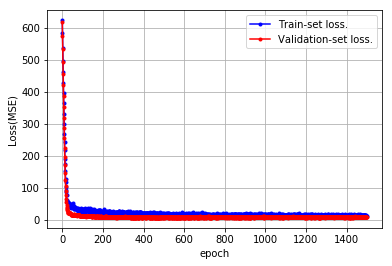

In [9]:
val_loss = history.history['val_mean_squared_error']
loss = history.history['mean_squared_error']

import numpy as np
import matplotlib.pyplot as plt

x_len = np.arange(len(loss))
plt.plot(x_len, loss, marker='.', c='blue', label="Train-set loss.")
plt.plot(x_len, val_loss, marker='.', c='red', label="Validation-set loss.")

plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('Loss(MSE)')
plt.show()

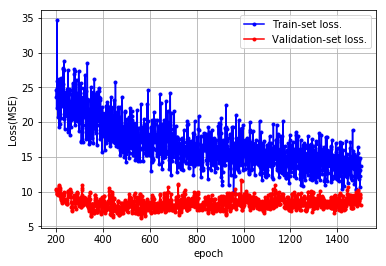

In [10]:
val_loss = history.history['val_mean_squared_error']
loss = history.history['mean_squared_error']

import numpy as np
import matplotlib.pyplot as plt

x_len = np.arange(len(loss))
plt.plot(x_len[200:], loss[200:], marker='.', c='blue', label="Train-set loss.")
plt.plot(x_len[200:], val_loss[200:], marker='.', c='red', label="Validation-set loss.")

plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('Loss(MSE)')
plt.show()

In [11]:
# Prediction on test data
model.predict(test_data)

array([[22.551222 ],
       [28.464073 ],
       [22.65426  ],
       [ 9.297983 ],
       [20.03958  ],
       [19.652014 ],
       [23.177347 ],
       [19.749159 ],
       [15.6073065],
       [20.449408 ],
       [11.242102 ],
       [ 4.2894773],
       [16.679722 ],
       [ 6.4816103],
       [36.14877  ],
       [34.823597 ],
       [23.207039 ],
       [37.39341  ],
       [29.30952  ],
       [20.073532 ],
       [23.595648 ],
       [20.717546 ],
       [20.057081 ],
       [25.980324 ],
       [19.911043 ],
       [26.45731  ],
       [17.06453  ],
       [14.79095  ],
       [39.036327 ],
       [16.902046 ],
       [14.982281 ],
       [16.237642 ],
       [20.623158 ],
       [19.239122 ],
       [27.927229 ],
       [20.452757 ],
       [ 6.668764 ],
       [40.36698  ],
       [10.816285 ],
       [15.948322 ],
       [23.130219 ],
       [20.808638 ],
       [19.353735 ],
       [20.816484 ],
       [20.763456 ],
       [24.054976 ],
       [20.231728 ],
       [12.98